# B1: Khai báo dữ liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import  load_model

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# B2: Đọc dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/DataGGColab/NFLX.csv')

# B3: Mô tả dữ liệu

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")

In [ ]:
df.shape

(1009, 7)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


# B4: Tiền xử lí dữ liệu

In [ ]:
df1=pd.DataFrame(df,columns=['Date','Close'])
df1.index=df1.Date
df1.drop("Date",axis=1,inplace=True)


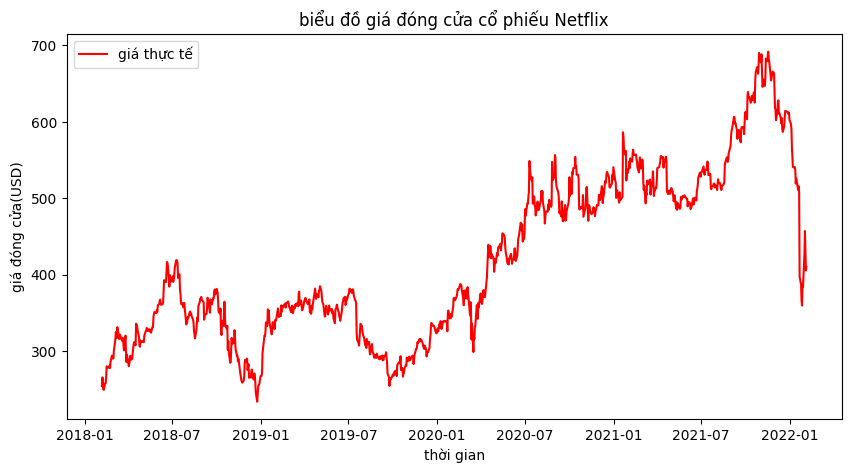

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df1['Close'],label='giá thực tế',color='red')
plt.title('biểu đồ giá đóng cửa cổ phiếu Netflix')
plt.xlabel('thời gian')
plt.ylabel('giá đóng cửa(USD)')
plt.legend()
plt.show()

In [ ]:
df1

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [ ]:
#chia tập dữ liệu
data=df1.values
train_data=data[:800]
test_data=data[800:]


In [ ]:
data

array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [429.480011],
       [405.600006],
       [410.170013]])

In [ ]:
#chuẩn hóa dữ liệu
sc=MinMaxScaler(feature_range=(0,1))
sc_train=sc.fit_transform(data)

In [ ]:
#tạo vòng lặp các giá trị; Sử dụng giá 50 ngày trước để dự đoán cho ngày kế tiếp
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0])
  y_train.append(sc_train[i,0])

In [ ]:
x_train #Gồm các mảng, mỗi mảng gồm 50 giá đóng cửa liên tục

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
        0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
        0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
        0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
        0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
        0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
        0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
        0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
        0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
        0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301]),
 array([0.06954849, 0.06701469, 0.03542955, 0.03405342, 0.05257641,
        0.05327534, 0.0701601 , 0.10133021, 0.09750767, 0.09757319,
        0.10301218, 0.09667768, 0.11369343, 0.13167034, 0.12391599,
        0.12559796, 0.12343551, 0.14672022, 0.1771914 , 0.19951508,
        0.19064677, 0.18156003, 0.2131015 , 0.

In [ ]:
y_train #danh sách giá đóng cửa của ngày hôm sau tương ứng với mỗi mảng của x_train

[0.2198291532720723,
 0.21585375515511074,
 0.20508504535780148,
 0.18525151821881236,
 0.15976056547319117,
 0.15700837786641864,
 0.17496342702188727,
 0.17011425156799265,
 0.17164322866457626,
 0.1734780444298597,
 0.17360909661393864,
 0.16996133223364263,
 0.18830954230997266,
 0.20178677968013004,
 0.2031629073403567,
 0.21061135325098623,
 0.20908237397009044,
 0.20222360063491573,
 0.20674514453645698,
 0.20150280816170107,
 0.20600248491297135,
 0.1995150752463799,
 0.19724337299694217,
 0.21393154942398507,
 0.2134946607555186,
 0.2421091647764957,
 0.2520914893870261,
 0.2564601139542174,
 0.25305259116043277,
 0.26137481659230777,
 0.25713724420919526,
 0.27533253713548766,
 0.27943905515020884,
 0.2881544393186327,
 0.2917586070100605,
 0.27854347837668547,
 0.2767305275773607,
 0.2786527333084864,
 0.2838513419356371,
 0.31901878280740115,
 0.3472837881257538,
 0.3453397851423501,
 0.34188853460096014,
 0.37373584482909394,
 0.3994670413455388,
 0.39658373165669414,
 0.3

In [ ]:
#xếp dữ liệu thành 1 mảng
x_train=np.array(x_train)
y_train=np.array(y_train)

#xếp dữ liệu thành mảng 1 chiều
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))

# B5: Xây dựng và huấn luyện mô hình

In [ ]:
#xây dựng mô hình
model=Sequential()
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
#huấn luyện mô hình
save_model="save_model.hdf5"
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100, batch_size=50,verbose=2, callbacks=[best_model])


Epoch 1/100

Epoch 1: loss improved from inf to 0.11950, saving model to save_model.hdf5
15/15 - 6s - loss: 0.1195 - 6s/epoch - 392ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.11950 to 0.06178, saving model to save_model.hdf5
15/15 - 3s - loss: 0.0618 - 3s/epoch - 227ms/step
Epoch 3/100

Epoch 3: loss improved from 0.06178 to 0.05776, saving model to save_model.hdf5
15/15 - 3s - loss: 0.0578 - 3s/epoch - 196ms/step
Epoch 4/100

Epoch 4: loss improved from 0.05776 to 0.05355, saving model to save_model.hdf5
15/15 - 2s - loss: 0.0536 - 2s/epoch - 118ms/step
Epoch 5/100

Epoch 5: loss did not improve from 0.05355
15/15 - 2s - loss: 0.0538 - 2s/epoch - 115ms/step
Epoch 6/100

Epoch 6: loss improved from 0.05355 to 0.05098, saving model to save_model.hdf5
15/15 - 2s - loss: 0.0510 - 2s/epoch - 121ms/step
Epoch 7/100

Epoch 7: loss improved from 0.05098 to 0.04918, saving model to save_model.hdf5
15/15 - 2s - loss: 0.0492 - 2s/epoch - 120ms/step
Epoch 8/100

Epoch 8: loss improved from 0.04918 to 0.04821, saving model to save_model.hdf5
15/15 - 2s - loss: 0.0482 - 2s/epoch - 115ms/step
Epoch 9/100

Epoch 9: loss did not improve from 

In [ ]:
#dữ liệu train
y_train=sc.inverse_transform(y_train) #giá thực
final_model=load_model('save_model.hdf5')
y_train_predict=final_model.predict(x_train)
y_train_predict=sc.inverse_transform(y_train_predict) #giá dự đoán

24/24 [==============================] - 2s 34ms/step


# B6: Sử dụng mô hình

In [ ]:
#Xử lí dữ liệu test
test=df1[len(train_data)-50:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)

x_test=[]
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test=data[800:] #giá thực
y_test_predict=final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict) #giá dự đoán

7/7 [==============================] - 0s 34ms/step


# Độ chính xác của mô hình

<ipython-input-115-bf84f1b0526a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['dự đoán']=y_train_predict #thêm dữ liệu
<ipython-input-115-bf84f1b0526a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['dự đoán']=y_test_predict #thêm dữ liệu


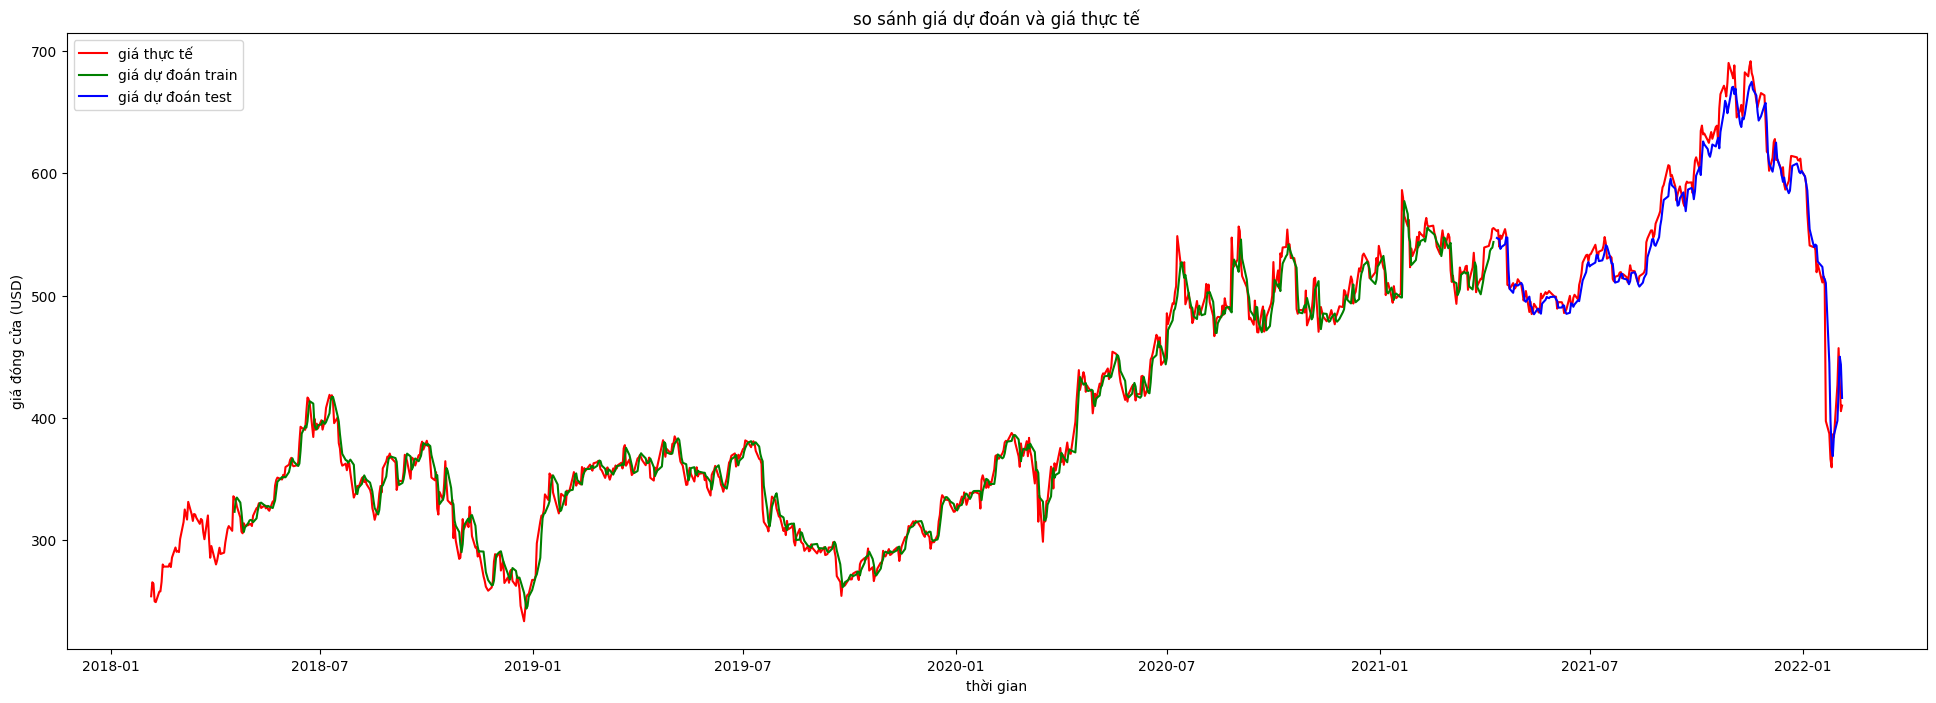

In [ ]:
#lập biểu đồ so sánh
train_data1=df1[50:800]
test_data1=df1[800:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='giá thực tế',color='red') #đường giá thực
train_data1['dự đoán']=y_train_predict #thêm dữ liệu

plt.plot(train_data1['dự đoán'],label='giá dự đoán train',color='green') #đường giá dự báo train
test_data1['dự đoán']=y_test_predict #thêm dữ liệu

plt.plot(test_data1['dự đoán'],label='giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('so sánh giá dự đoán và giá thực tế')
plt.xlabel('thời gian')
plt.ylabel('giá đóng cửa (USD)')
plt.legend()
plt.show()

In [ ]:
#r2
print('độ phù hợp của tập train: ', r2_score(y_train,y_train_predict)*100)
#mae
print('sai số tuyệt đối trung bình tập train: ', mean_absolute_error(y_train,y_train_predict), 'USD')
#mape
print('phần trăm sai số tuyệt đối trung bình tập train: ', mean_absolute_percentage_error(y_train,y_train_predict)*100)

độ phù hợp của tập train:  98.25667616924366
sai số tuyệt đối trung bình tập train:  7.94884946222396 USD
phần trăm sai số tuyệt đối trung bình tập train:  2.063573474971616


In [ ]:
train_data1

,Close,dự đoán
Date,,
2018-04-18,334.519989,323.320007
2018-04-19,332.700012,332.871552
2018-04-20,327.769989,334.964447
2018-04-23,318.690002,330.938934
2018-04-24,307.019989,322.824585
...,...,...
2021-04-05,540.669983,530.402649
2021-04-06,544.530029,536.557800
2021-04-07,546.989990,538.490051


In [ ]:
#r2
print('độ phù hợp của tập test: ', r2_score(y_test,y_test_predict)*100)
#mae
print('sai số tuyệt đối trung bình tập test: ', mean_absolute_error(y_test,y_test_predict) ,' USD')
#mape
print('phần trăm sai số tuyệt đối trung bình tập test: ', mean_absolute_percentage_error(y_test,y_test_predict)*100)

độ phù hợp của tập test:  94.96665963708469
sai số tuyệt đối trung bình tập test:  10.430571320854517  USD
phần trăm sai số tuyệt đối trung bình tập test:  1.9284801989874634


In [ ]:
test_data1

,Close,dự đoán
Date,,
2021-04-12,552.780029,547.185364
2021-04-13,553.729980,546.546631
2021-04-14,540.020020,546.231812
2021-04-15,549.219971,538.258240
2021-04-16,546.539978,539.916138
...,...,...
2022-01-31,427.140015,397.787903
2022-02-01,457.130005,421.993683
2022-02-02,429.480011,450.161469
